In [10]:
import cv2
import numpy as np

# 加载图片
image_path = '/home/daichang/Desktop/teeth_ws/src/markless-calibration/image/2024-07-23_21-30.png'
image = cv2.imread(image_path)
if image is None:
    print("Image not found")
    exit()

# 转换为灰度图
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 应用高斯模糊
gray_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
# 腐蚀操作
kernel = np.ones((3,3), np.uint8)
gray_image = cv2.erode(gray_image, kernel, iterations=1)
# 使用 Otsu 的方法自动确定二值化阈值
otsu_thresh, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
threshold1 = 0.5 * otsu_thresh
threshold2 = otsu_thresh
print(f'threshold1:{threshold1}, threshold2:{threshold2}')

# 应用 Canny 边缘检测
edges = cv2.Canny(gray_image, threshold1, threshold2)

# 查找边缘的轮廓，只检索最外层轮廓
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
min_area = 10
large_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# 打印和绘制轮廓
print(f"Number of main contours: {len(large_contours)}")
for i, contour in enumerate(large_contours):
    print(f"Contour {i} has {len(contour)} points:")
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)  # 绿色轮廓

# 显示结果
cv2.imshow("Contours", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


threshold1:87.0, threshold2:174.0
Number of main contours: 0


Number of detected edges: 12


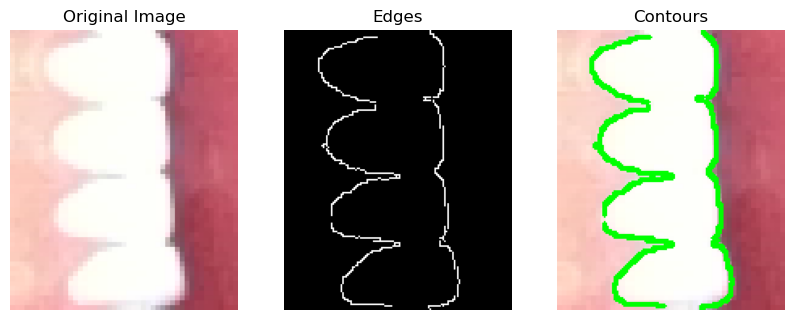

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path):
    # 读取图像
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    # 转换为灰度图像
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 应用高斯模糊去噪声
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # 使用Canny边缘检测
    # edges = cv2.Canny(blurred, threshold1=30, threshold2=90)
    edges = cv2.Canny(blurred, threshold1=20, threshold2=90)

    # 使用findContours检测边缘轮廓
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 在原图上绘制轮廓
    contour_image = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)
    # 打印边缘数
    print(f"Number of detected edges: {len(contours)}")

    
    # 显示结果
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Edges')
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Contours')
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

# 使用具体的图片路径
process_image('/home/daichang/Desktop/teeth_ws/src/markless-calibration/image/2024-07-23_21-30.png')


Number of detected edges: 7


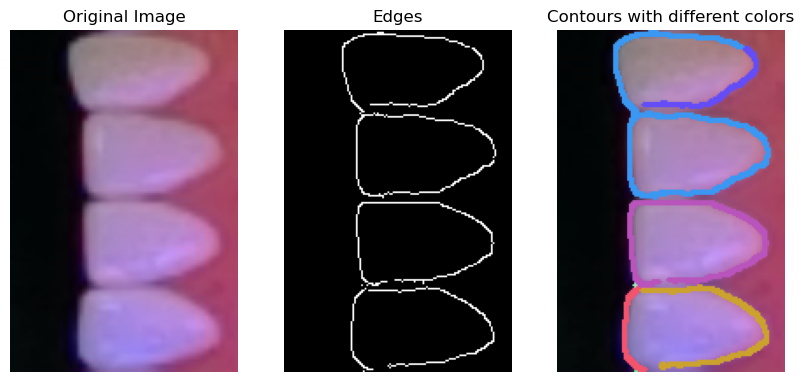

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path):
    # 读取图像
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    # 转换为灰度图像
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 应用高斯模糊去噪声
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # 使用Canny边缘检测
    edges = cv2.Canny(blurred, threshold1=20, threshold2=90)

    # 使用findContours检测边缘轮廓
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # 打印边缘数
    print(f"Number of detected edges: {len(contours)}")

    # 在原图上绘制不同颜色的轮廓
    contour_image = image.copy()
    for contour in contours:
        color = tuple(np.random.randint(0, 255, size=3).tolist())  # 生成随机颜色
        cv2.drawContours(contour_image, [contour], -1, color, 2)
    
    # 显示结果
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Edges')
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Contours with different colors')
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

# 使用具体的图片路径
# process_image('/home/daichang/Desktop/teeth_ws/src/markless-calibration/image/2024-07-23_21-19.png')
process_image('/home/daichang/Desktop/teeth_ws/src/markless-calibration/image/2024-07-29_20-45.png')



# process_image('/home/daichang/Desktop/teeth_ws/src/markless-calibration/image/2024-07-23_22-29.png')



In [2]:
# 读取点云文件并删除每行最后一个数，只保留前三个
def process_point_cloud(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        for line in infile:
            # 将每行分割成数值列表
            parts = line.strip().split()
            # 只保留前三个数值
            new_line = ' '.join(parts[:3])
            # 写入新文件
            outfile.write(new_line + '\n')

# 使用示例
input_file = '/home/daichang/Desktop/teeth_ws/src/markless-calibration/pcd/wait-to-reg/sample_all.txt'  # 输入点云文件
output_file = '/home/daichang/Desktop/teeth_ws/src/markless-calibration/pcd/wait-to-reg/sample_all1.txt'  # 输出点云文件
process_point_cloud(input_file, output_file)


In [6]:
import open3d as o3d
import numpy as np

def read_point_cloud_from_txt(file_path):
    # 读取点云文件
    points = np.loadtxt(file_path, delimiter=' ')
    # 创建Open3D点云对象
    point_cloud = o3d.geometry.PointCloud()
    # 设置点云的点
    point_cloud.points = o3d.utility.Vector3dVector(points[:, :3])
    return point_cloud

def save_point_cloud_to_txt(point_cloud, file_path):
    # 获取点云中的点
    points = np.asarray(point_cloud.points)
    # 保存为txt文件
    np.savetxt(file_path, points, delimiter=' ')

def remove_outliers(point_cloud, nb_neighbors=20, std_ratio=2.0):
    # 统计离群值去除
    cl, ind = point_cloud.remove_statistical_outlier(nb_neighbors=nb_neighbors, std_ratio=std_ratio)
    # 保留内点
    inlier_cloud = point_cloud.select_by_index(ind)
    return inlier_cloud

# 输入和输出文件路径
input_file = '/home/daichang/Desktop/teeth_ws/src/markless-calibration/pcd/wait-to-reg/sample_all1.txt'  # 输入点云文件
output_file = '/home/daichang/Desktop/teeth_ws/src/markless-calibration/pcd/wait-to-reg/sample_all_in.txt'  # 输出点云文件

# 读取点云文件
pcd = read_point_cloud_from_txt(input_file)

# 去除离群值
pcd_inliers = remove_outliers(pcd)

# 保存处理后的点云到txt文件
save_point_cloud_to_txt(pcd_inliers, output_file)

print("点云处理完成并保存到文件:", output_file)


点云处理完成并保存到文件: /home/daichang/Desktop/teeth_ws/src/markless-calibration/pcd/wait-to-reg/sample_all_in.txt
